In [ ]:
from IPython.core.display import display, HTML
from string import Template
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as flt
from IPython.core.display import display, HTML
import pandas as pd
import re

In [ ]:
import torch
import torchvision
from torchvision import transforms
from torchsummary import summary
import keras
from torch.utils.data import DataLoader,Dataset
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt  # для отрисовки картиночек
%matplotlib inline

In [ ]:
import tqdm

In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
ind = 16

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/'

In [ ]:
df = pd.read_csv(path + 'media/train.csv')

In [ ]:
df.head()

,id,name,label,attributes,points,image
0,16,Cr1,9,1,"[[189,308],[188,306],[188,305],[187,303],[187,...",/media/category_52/000078.jpg
1,17,Cr1,9,2,"[[154,303],[154,301],[154,299],[154,297],[154,...",/media/category_52/000079.jpg
2,18,Cr1,9,3,"[[197,319],[194,320],[193,321],[193,323],[193,...",/media/category_52/000080.jpg
3,20,Cr1,9,4,"[[193,329],[196,328],[198,327],[201,326],[203,...",/media/category_52/000081.jpg
4,21,Cr1,9,5,"[[150,283],[152,282],[154,281],[154,280],[156,...",/media/category_52/000082.jpg


In [ ]:
df['name'].unique()

array(['Cr1', 'Cr2', 'Cr3', 'Cr4', 'Cr5', 'Cr6', 'Cr7', 'Cr8', 'Cr9',
       'Cr10', 'large cell carcinoma', 'adenocarcinoma',
       'non-small-cell lung carcinoma', 'squamous cell carcinoma'],
      dtype=object)

In [ ]:
(df['name'].unique())

array(['Cr1', 'Cr2', 'Cr3', 'Cr4', 'Cr5', 'Cr6', 'Cr7', 'Cr8', 'Cr9',
       'Cr10', 'large cell carcinoma', 'adenocarcinoma',
       'non-small-cell lung carcinoma', 'squamous cell carcinoma'],
      dtype=object)

In [ ]:
len(df[df['name'] == 'non-small-cell lung carcinoma'])

6

In [ ]:
for i in (df['name'].unique()): 
    count = 0
    for j in range(len(df['name'])):          
        if df['name'][j] == i:
            count = count + 1
    print(i , ' ', count*100/len(df['name']))

Cr1   1.6853932584269662
Cr2   0.9363295880149812
Cr3   3.745318352059925
Cr4   0.5617977528089888
Cr5   0.7490636704119851
Cr6   0.9363295880149812
Cr7   2.6217228464419478
Cr8   0.7490636704119851
Cr9   0.9363295880149812
Cr10   1.6853932584269662
large cell carcinoma   2.9962546816479403
adenocarcinoma   77.52808988764045
non-small-cell lung carcinoma   1.1235955056179776
squamous cell carcinoma   3.745318352059925


In [ ]:
len(df[df['name'] == 'squamous cell carcinoma'])

20

In [ ]:
len(df[df['name'] == 'adenocarcinoma'])

414

In [ ]:
df = df.replace(to_replace =['Cr1', 'Cr2', 'Cr3', 'Cr4', 'Cr5', 'Cr6', 'Cr7', 'Cr8', 'Cr9',
       'Cr10'], value ='adenocarcinoma')

In [ ]:
num = df['name'].unique()

In [ ]:
df

,id,name,label,attributes,points,image
0,16,adenocarcinoma,9,1,"[[189,308],[188,306],[188,305],[187,303],[187,...",/media/category_52/000078.jpg
1,17,adenocarcinoma,9,2,"[[154,303],[154,301],[154,299],[154,297],[154,...",/media/category_52/000079.jpg
2,18,adenocarcinoma,9,3,"[[197,319],[194,320],[193,321],[193,323],[193,...",/media/category_52/000080.jpg
3,20,adenocarcinoma,9,4,"[[193,329],[196,328],[198,327],[201,326],[203,...",/media/category_52/000081.jpg
4,21,adenocarcinoma,9,5,"[[150,283],[152,282],[154,281],[154,280],[156,...",/media/category_52/000082.jpg
...,...,...,...,...,...,...
529,616,adenocarcinoma,20,1,"[[159,347],[163,345],[164,344],[165,343],[167,...",/media/category_153/000033.jpg
530,617,adenocarcinoma,20,2,"[[166,329],[171,325],[175,325],[175,324],[177,...",/media/category_153/000034.jpg
531,618,adenocarcinoma,20,3,"[[184,340],[184,336],[184,332],[185,330],[188,...",/media/category_153/000035.jpg
532,619,adenocarcinoma,20,4,"[[161,344],[165,342],[168,341],[168,340],[174,...",/media/category_153/000036.jpg


In [ ]:
df1 = df
for i in range(len(df['name'])):
    for j in range(len(num)):
        if df['name'][i] == num[j]:
            df1['name'][i] = j

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
#change string to np array
df['points'] = df['points'].apply(lambda x: np.array(eval(x)), 0)

In [ ]:
dfnew = []

In [ ]:
df['image'][0]

'/media/category_52/000078.jpg'

In [ ]:
df[df['name'] == 3]

,id,name,label,attributes,points,image
113,151,3,22,1,"[[331, 306], [330, 305], [329, 305], [329, 304...",/media/category_69/000063.jpg
114,152,3,22,2,"[[323, 302], [320, 303], [319, 303], [318, 302...",/media/category_69/000064.jpg
115,153,3,22,3,"[[303, 289], [302, 291], [302, 293], [303, 295...",/media/category_69/000065.jpg
116,154,3,22,4,"[[310, 303], [312, 305], [312, 305], [313, 306...",/media/category_69/000066.jpg
117,155,3,22,5,"[[338, 361], [341, 360], [341, 359], [342, 359...",/media/category_69/000067.jpg
118,156,3,22,6,"[[321, 371], [322, 369], [322, 369], [324, 369...",/media/category_69/000068.jpg
119,157,3,22,7,"[[316, 348], [317, 346], [317, 345], [317, 344...",/media/category_69/000069.jpg
120,158,3,22,8,"[[331, 372], [331, 370], [331, 369], [331, 368...",/media/category_69/000070.jpg
121,159,3,22,9,"[[321, 359], [323, 359], [324, 359], [327, 360...",/media/category_69/000071.jpg
130,168,3,22,1,"[[332, 274], [333, 273], [335, 272], [335, 270...",/media/category_71/000066.jpg


In [ ]:
df['dots'] = df['points'].apply(np.array)

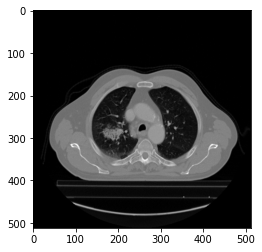

In [ ]:
origImage = cv2.imread(path  + df['image'][ind])
origImage = cv2.cvtColor(origImage, cv2.COLOR_BGR2GRAY, )
plt.imshow(origImage,cmap = "gray")

In [ ]:
from matplotlib.path import Path

tupVerts= df['points'][ind]


x, y = np.meshgrid(np.arange(origImage.shape[0]), np.arange(origImage.shape[1])) # make a canvas with coordinates
x, y = x.flatten(), y.flatten()
points = np.vstack((x,y)).T 

p = Path(tupVerts) # make a polygon
grid = p.contains_points(points)
mask = grid.reshape(origImage.shape) # now you have a mask with points inside a polygon

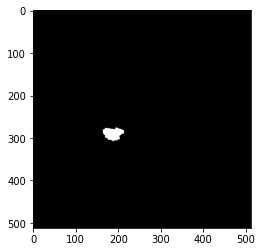

In [ ]:
plt.imshow(mask,cmap = "gray")

In [ ]:
from tqdm import tqdm
ar = []
for ind in tqdm(range(len(df['image']))):
    tupVerts= df['points'][ind]


    x, y = np.meshgrid(np.arange(origImage.shape[0]), np.arange(origImage.shape[1])) # make a canvas with coordinates
    x, y = x.flatten(), y.flatten()
    points = np.vstack((x,y)).T 

    p = Path(tupVerts) # make a polygon
    grid = p.contains_points(points)
    mask = grid.reshape(origImage.shape) # now you have a mask with points inside a polygon
    ar.append(mask)
df['mask'] = ar

100%|██████████| 534/534 [00:25<00:00, 20.54it/s]


In [ ]:
ar = []
for ind in tqdm(range(len(df['image']))):
    origImage = cv2.imread(path  + df['image'][ind])
    origImage = cv2.cvtColor(origImage, cv2.COLOR_BGR2GRAY, )
    ar.append(origImage)
df['img'] = ar

100%|██████████| 534/534 [00:03<00:00, 158.25it/s]


In [ ]:

import torch
import torch.nn as nn
import torch.nn.functional as F


class DoubleConv(nn.Module):
    """(convolution => [BN] => ReLU) * 2"""

    def __init__(self, in_channels, out_channels, mid_channels=None):
        super().__init__()
        if not mid_channels:
            mid_channels = out_channels
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(mid_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)


class Down(nn.Module):
    """Downscaling with maxpool then double conv"""

    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, out_channels)
        )

    def forward(self, x):
        return self.maxpool_conv(x)


class Up(nn.Module):
    """Upscaling then double conv"""

    def __init__(self, in_channels, out_channels, bilinear=True):
        super().__init__()

        # if bilinear, use the normal convolutions to reduce the number of channels
        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
            self.conv = DoubleConv(in_channels, out_channels, in_channels // 2)
        else:
            self.up = nn.ConvTranspose2d(in_channels , in_channels // 2, kernel_size=2, stride=2)
            self.conv = DoubleConv(in_channels, out_channels)


    def forward(self, x1, x2):
        x1 = self.up(x1)
        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
                        diffY // 2, diffY - diffY // 2])
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)


class OutConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(OutConv, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        return self.conv(x)

In [ ]:
import torch.nn.functional as F




class UNet(nn.Module):
    def __init__(self, n_channels, n_classes, bilinear=True):
        super(UNet, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.bilinear = bilinear

        self.inc = DoubleConv(n_channels, 64)
        self.down1 = Down(64, 128)
        self.down2 = Down(128, 256)
        self.down3 = Down(256, 512)
        factor = 2 if bilinear else 1
        self.down4 = Down(512, 1024 // factor)
        self.up1 = Up(1024, 512 // factor, bilinear)
        self.up2 = Up(512, 256 // factor, bilinear)
        self.up3 = Up(256, 128 // factor, bilinear)
        self.up4 = Up(128, 64, bilinear)
        self.outc = OutConv(64, n_classes)

    def forward(self, x):
        
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        logits = self.outc(x)
        return logits

In [ ]:
x = []
y = []
z = []
for ind in tqdm(range(len(df))):
    x.append(df['img'][ind])
    y.append(df['mask'][ind])
    z.append(df['name'][ind])

100%|██████████| 534/534 [00:00<00:00, 57706.40it/s]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, z_train, z_test = train_test_split(x, y, z, test_size=0.2, random_state=10)

In [ ]:
import torch
import torchvision
from torchvision import transforms
from torchsummary import summary
import keras
from torch.utils.data import DataLoader,Dataset
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt  # для отрисовки картиночек
class MyDataset(Dataset):
    def __init__(self, data, targets, label, transform=None):
        self.data = data
        self.targets = torch.LongTensor(targets)
        self.label = label
        self.transform = transform

    def __getitem__(self, index):
        x = self.data[index]
        y = self.targets[index]
        z = self.label[index]
        if self.transform:
            x = Image.fromarray(self.data[index].astype(np.uint8))
            x = self.transform(x)

        return x, y, z

    def __len__(self):
        return len(self.data)
%matplotlib inline
transform = transforms.Compose([transforms.ToTensor()])
dataset = MyDataset(X_train,y_train, z_train, transform=transform)
trainloader = DataLoader(dataset, batch_size=4)

testset = MyDataset(X_test,y_test, z_test, transform=transform)
testloader = DataLoader(testset, batch_size=4)

In [ ]:
trainloader

In [ ]:
cnt = 0
temp = 0
for i, batch in enumerate(tqdm(trainloader)):
        # так получаем текущий батч
        X_batch, y_batch, z_batch = batch
        cnt = i
        if i % 2000 == 1999:
            temp += 1 
cnt,temp

100%|██████████| 107/107 [00:00<00:00, 179.90it/s]


(106, 0)

In [ ]:
net = UNet(1, len(num))

In [ ]:
if torch.cuda.is_available():
    net.cuda()

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
import argparse
import logging
import os
import sys

import numpy as np
import torch
import torch.nn as nn
from torch import optim
from tqdm import tqdm

from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader, random_split

In [ ]:
optimizer = optim.RMSprop(net.parameters(), lr=1e-5, weight_decay=1e-8, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min' if net.n_classes > 1 else 'max', patience=2)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
device

device(type='cuda')

In [44]:
import torch
error = []
for epoch in range(50):
        print('epoch: ------', epoch)
        net.train()
        epoch_loss = 0
        for ind, batch in enumerate(tqdm(trainloader)):
                imgs, true_masks, label= batch
                assert imgs.shape[1] == net.n_channels, 'Network has been defined with {net.n_channels} input channels but loaded images have {imgs.shape[1]} channels. Please check that the images are loaded correctly.'

                imgs = imgs.to(device=device, dtype=torch.float32)
                mask_type = torch.float32 if net.n_classes == 1 else torch.long
                true_masks = true_masks.to(device=device, dtype=mask_type)

                masks_pred = net(imgs)
                loss = criterion(masks_pred, true_masks)
                epoch_loss += loss.item()                
                if (ind == 0):
                    print('loss: ', loss)
                    error.append(loss)
                optimizer.zero_grad()
                loss.backward()
                nn.utils.clip_grad_value_(net.parameters(), 0.1)
                optimizer.step()

  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 0


  1%|          | 1/107 [00:00<00:39,  2.67it/s]

loss:  tensor(1.5045, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 1


  1%|          | 1/107 [00:00<01:13,  1.44it/s]

loss:  tensor(0.4259, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 2


  1%|          | 1/107 [00:00<01:15,  1.41it/s]

loss:  tensor(0.2714, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 3


  1%|          | 1/107 [00:00<01:14,  1.42it/s]

loss:  tensor(0.1784, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 4


  1%|          | 1/107 [00:00<01:15,  1.41it/s]

loss:  tensor(0.1196, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 5


  1%|          | 1/107 [00:00<01:15,  1.40it/s]

loss:  tensor(0.0839, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 6


  1%|          | 1/107 [00:00<01:15,  1.41it/s]

loss:  tensor(0.0557, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 7


  1%|          | 1/107 [00:00<01:15,  1.41it/s]

loss:  tensor(0.0420, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 8


  1%|          | 1/107 [00:00<01:16,  1.39it/s]

loss:  tensor(0.0295, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 9


  1%|          | 1/107 [00:00<01:15,  1.41it/s]

loss:  tensor(0.0213, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 10


  1%|          | 1/107 [00:00<01:15,  1.40it/s]

loss:  tensor(0.0163, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 11


  1%|          | 1/107 [00:00<01:15,  1.40it/s]

loss:  tensor(0.0127, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 12


  1%|          | 1/107 [00:00<01:15,  1.41it/s]

loss:  tensor(0.0101, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 13


  1%|          | 1/107 [00:00<01:15,  1.41it/s]

loss:  tensor(0.0111, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 14


  1%|          | 1/107 [00:00<01:15,  1.41it/s]

loss:  tensor(0.0074, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 15


  1%|          | 1/107 [00:00<01:15,  1.40it/s]

loss:  tensor(0.0049, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 16


  1%|          | 1/107 [00:00<01:16,  1.39it/s]

loss:  tensor(0.0052, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 17


  1%|          | 1/107 [00:00<01:15,  1.41it/s]

loss:  tensor(0.0051, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 18


  1%|          | 1/107 [00:00<01:15,  1.41it/s]

loss:  tensor(0.0046, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 19


  1%|          | 1/107 [00:00<01:15,  1.41it/s]

loss:  tensor(0.0035, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 20


  1%|          | 1/107 [00:00<01:15,  1.41it/s]

loss:  tensor(0.0057, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 21


  1%|          | 1/107 [00:00<01:16,  1.39it/s]

loss:  tensor(0.0038, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 22


  1%|          | 1/107 [00:00<01:15,  1.40it/s]

loss:  tensor(0.0031, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 23


  1%|          | 1/107 [00:00<01:15,  1.41it/s]

loss:  tensor(0.0023, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 24


  1%|          | 1/107 [00:00<01:16,  1.39it/s]

loss:  tensor(0.0042, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 25


  1%|          | 1/107 [00:00<01:15,  1.40it/s]

loss:  tensor(0.0043, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 26


  1%|          | 1/107 [00:00<01:15,  1.41it/s]

loss:  tensor(0.0033, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 27


  1%|          | 1/107 [00:00<01:15,  1.41it/s]

loss:  tensor(0.0028, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 28


  1%|          | 1/107 [00:00<01:15,  1.41it/s]

loss:  tensor(0.0034, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 29


  1%|          | 1/107 [00:00<01:15,  1.40it/s]

loss:  tensor(0.0033, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 30


  1%|          | 1/107 [00:00<01:15,  1.41it/s]

loss:  tensor(0.0021, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 31


  1%|          | 1/107 [00:00<01:15,  1.41it/s]

loss:  tensor(0.0051, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 32


  1%|          | 1/107 [00:00<01:15,  1.40it/s]

loss:  tensor(0.0029, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 33


  1%|          | 1/107 [00:00<01:15,  1.40it/s]

loss:  tensor(0.0026, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 34


  1%|          | 1/107 [00:00<01:15,  1.40it/s]

loss:  tensor(0.0022, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 35


  1%|          | 1/107 [00:00<01:16,  1.39it/s]

loss:  tensor(0.0024, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 36


  1%|          | 1/107 [00:00<01:16,  1.39it/s]

loss:  tensor(0.0032, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 37


  1%|          | 1/107 [00:00<01:16,  1.39it/s]

loss:  tensor(0.0020, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 38


  1%|          | 1/107 [00:00<01:16,  1.38it/s]

loss:  tensor(0.0020, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 39


  1%|          | 1/107 [00:00<01:15,  1.41it/s]

loss:  tensor(0.0020, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 40


  1%|          | 1/107 [00:00<01:15,  1.40it/s]

loss:  tensor(0.0024, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 41


  1%|          | 1/107 [00:00<01:16,  1.39it/s]

loss:  tensor(0.0023, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 42


  1%|          | 1/107 [00:00<01:15,  1.40it/s]

loss:  tensor(0.0019, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 43


  1%|          | 1/107 [00:00<01:15,  1.41it/s]

loss:  tensor(0.0016, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 44


  1%|          | 1/107 [00:00<01:15,  1.40it/s]

loss:  tensor(0.0024, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 45


  1%|          | 1/107 [00:00<01:15,  1.40it/s]

loss:  tensor(0.0021, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 46


  1%|          | 1/107 [00:00<01:15,  1.40it/s]

loss:  tensor(0.0022, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 47


  1%|          | 1/107 [00:00<01:15,  1.41it/s]

loss:  tensor(0.0018, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 48


  1%|          | 1/107 [00:00<01:15,  1.40it/s]

loss:  tensor(0.0020, device='cuda:0', grad_fn=<NllLoss2DBackward>)


  0%|          | 0/107 [00:00<?, ?it/s]

epoch: ------ 49


  1%|          | 1/107 [00:00<01:16,  1.39it/s]

loss:  tensor(0.0020, device='cuda:0', grad_fn=<NllLoss2DBackward>)


100%|██████████| 107/107 [01:27<00:00,  1.22it/s]


In [45]:
from google.colab import files
torch.save(net, 'weights.pth')
files.download('weights.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
torch.save(net.state_dict(), 'weights1.pth')
files.download('weights1.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

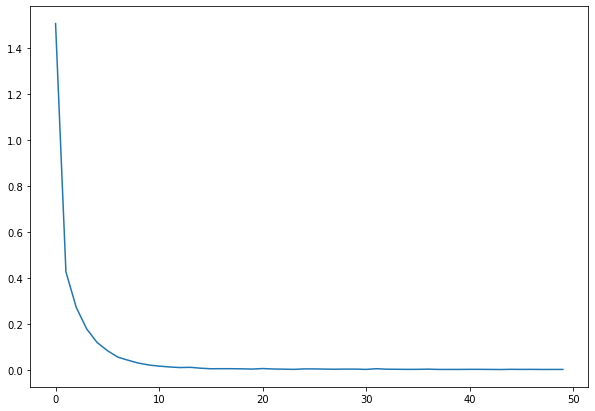

In [47]:
plt.figure(figsize=(10,7))
plt.plot(np.arange(len(error)), error)
plt.show()

In [48]:
    net.eval()

    img = torch.from_numpy(np.array(X_test))



In [49]:
    img = img.unsqueeze(0)
    img = img.to(device=device, dtype=torch.float32)

    

In [63]:
predicted = []
with torch.no_grad():
    for data in tqdm(testloader):
        img_np, mask, label = data
        img = img_np.to(device=device, dtype=torch.float32)
        output = net(img)

        if net.n_classes > 1:
            probs = F.softmax(output, dim=1)
        else:
            probs = torch.sigmoid(output)

        probs = probs.squeeze(0)

        tf = transforms.Compose(
            [
                transforms.ToPILImage(),
                transforms.Resize(origImage.shape[1]),
                transforms.ToTensor()
            ]
        )
        #print(probs[0])
        #probs = tf(probs.cpu())
        full_mask = (probs.squeeze().cpu().numpy())
        predicted.append([img_np, full_mask <= 0.7, mask, label])
      

100%|██████████| 27/27 [00:08<00:00,  3.35it/s]


In [64]:
np.array(predicted).shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


(27, 4)

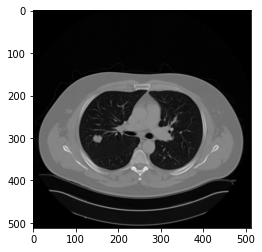

In [68]:
plt.imshow(predicted[1][0][0][0].numpy(),cmap = "gray")

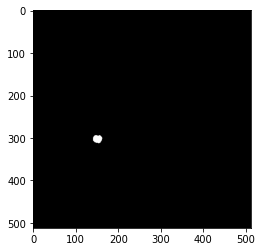

In [69]:
plt.imshow(predicted[1][1][0][0],cmap = "gray")

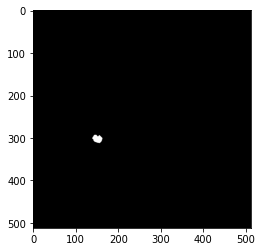

In [70]:
plt.imshow(predicted[1][2][0],cmap = "gray")

Data preparation for the second classification nn 

In [71]:
#пустой датасет в который будем складывать картинки и маски
df_train = []


In [72]:

with torch.no_grad():
    for data in tqdm(trainloader):
        img_np, mask, label = data
        img = img_np.to(device=device, dtype=torch.float32)
        output = net(img)

        if net.n_classes > 1:
            probs = F.softmax(output, dim=1)
        else:
            probs = torch.sigmoid(output)

        probs = probs.squeeze(0)

        tf = transforms.Compose(
            [
                transforms.ToPILImage(),
                transforms.Resize(origImage.shape[1]),
                transforms.ToTensor()
            ]
        )
        #print(probs[0])
        #probs = tf(probs.cpu())
        full_mask = (probs.squeeze().cpu().numpy()) <= 0.5
        #print(img.shape)
        #for i in range(3):
        for i in range(len(img)):
            df_train.append([img[i], mask[i], full_mask[i], label[i]])
      

100%|██████████| 107/107 [00:32<00:00,  3.27it/s]


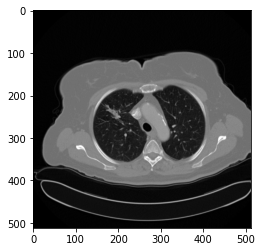

In [73]:
len(X_train)
plt.imshow(df_train[0][0][0].cpu().numpy(),cmap = "gray")

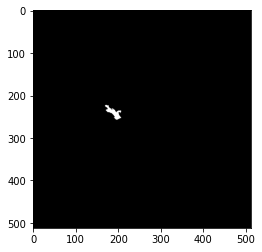

In [74]:
plt.imshow(df_train[0][1],cmap = "gray")

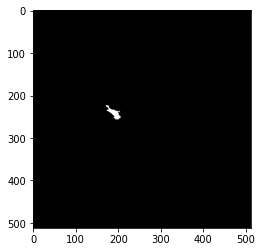

In [75]:
plt.imshow(df_train[0][2][0],cmap = "gray")

In [76]:
df_train[0][3]

tensor(0)

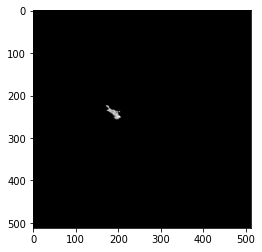

In [77]:
plt.imshow(df_train[0][0][0].cpu().numpy() * df_train[0][2][0],cmap = "gray")

In [80]:
X_train = []
for i in range(len(df_train)):
  X_train.append([df_train[i][0][0].cpu().numpy() * df_train[i][1].cpu().numpy(), np.array(df_train[i][3])])

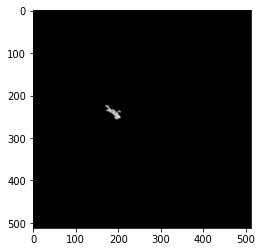

In [81]:
plt.imshow(X_train[0][0],cmap = "gray")

In [82]:
_df_train = pd.DataFrame(X_train,columns=['X',  'y'])

In [83]:
_df_train.to_csv('df_train.csv')
files.download('df_train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [84]:
df_test = []

with torch.no_grad():
    for data in tqdm(testloader):
        img_np, mask, label = data
        img = img_np.to(device=device, dtype=torch.float32)
        output = net(img)

        if net.n_classes > 1:
            probs = F.softmax(output, dim=1)
        else:
            probs = torch.sigmoid(output)

        probs = probs.squeeze(0)

        tf = transforms.Compose(
            [
                transforms.ToPILImage(),
                transforms.Resize(origImage.shape[1]),
                transforms.ToTensor()
            ]
        )
        #print(probs[0])
        #probs = tf(probs.cpu())
        full_mask = (probs.squeeze().cpu().numpy()) <= 0.7
        #print(img.shape)
        #for i in range(3):
        for i in range(len(img)):
            df_test.append([img[i], mask[i], full_mask[i], label[i]])
      

100%|██████████| 27/27 [00:07<00:00,  3.46it/s]


In [85]:
X_test = []
for i in range(len(df_test)):
  X_test.append([df_test[i][0][0].cpu().numpy() * df_test[i][2][0], np.array(df_test[i][3])])

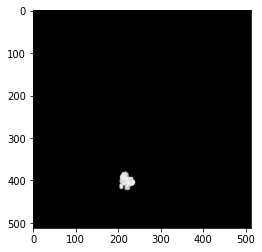

In [86]:
plt.imshow(X_test[5][0],cmap = "gray")

In [87]:
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [88]:
files.download('X_train.npy')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [89]:
files.download('X_test.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [90]:
np.save('df_test.npy', df_test)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [91]:
files.download('df_test.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [98]:
squamus = []
for i in range(len(df_test)):
  if df_test[i][3].numpy() == 3:
    squamus.append(df_test[i])

In [101]:
#df_test.append([img[i], mask[i], full_mask[i], label[i]])

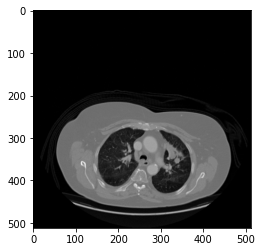

In [102]:
plt.imshow(squamus[0][0][0].cpu().numpy(),cmap = "gray")

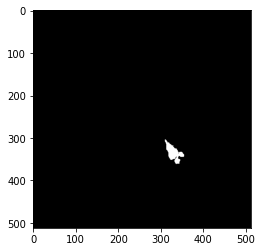

In [104]:
plt.imshow(squamus[0][1],cmap = "gray")

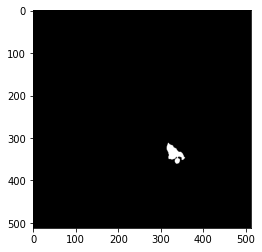

In [106]:
plt.imshow(squamus[0][2][0],cmap = "gray")

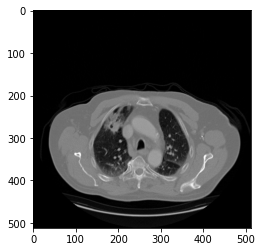

In [113]:
plt.imshow(squamus[1][0][0].cpu().numpy(),cmap = "gray")

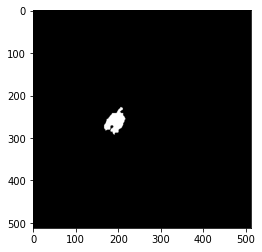

In [114]:
plt.imshow(squamus[1][1],cmap = "gray")

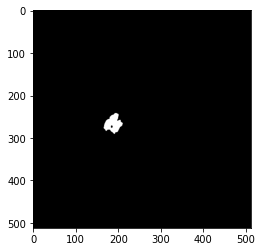

In [115]:
plt.imshow(squamus[1][2][0],cmap = "gray")

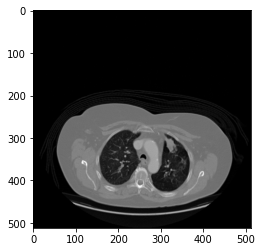

In [117]:
plt.imshow(squamus[2][0][0].cpu().numpy(),cmap = "gray")


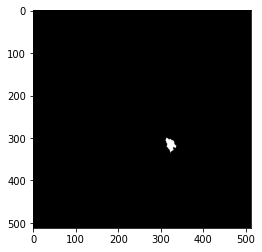

In [118]:
plt.imshow(squamus[2][1],cmap = "gray")

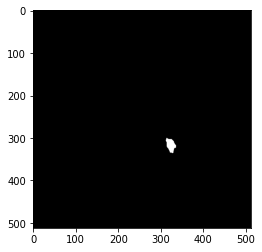

In [119]:

plt.imshow(squamus[2][2][0],cmap = "gray")

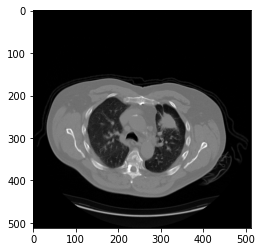

In [121]:
plt.imshow(squamus[3][0][0].cpu().numpy(),cmap = "gray")


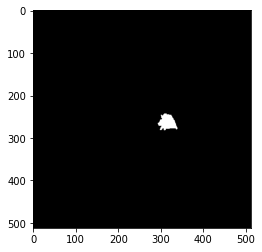

In [123]:
plt.imshow(squamus[3][1],cmap = "gray")


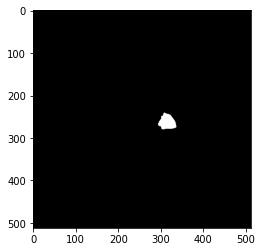

In [124]:
plt.imshow(squamus[3][2][0],cmap = "gray")


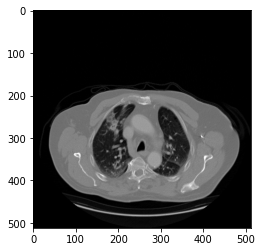

In [125]:
plt.imshow(squamus[4][0][0].cpu().numpy(),cmap = "gray")


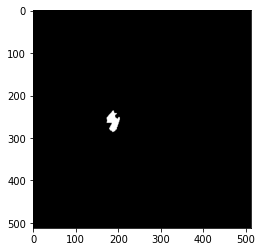

In [126]:
plt.imshow(squamus[4][1],cmap = "gray")


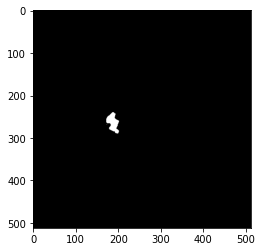

In [127]:
plt.imshow(squamus[4][2][0],cmap = "gray")
